# Tasks
- Search how to build the pipeline (Aleja)

## Libraries

In [1]:
# For handling data
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For machine learning
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# For computing the MinPts nearest neighbors
from sklearn.neighbors import NearestNeighbors

In [2]:
path = './DSL_Winter_Project_2024/'
df = pd.read_csv(path + 'development.csv')

In [3]:
# Let's see what we have
df.head()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [4]:
# Let's separate the data into X and y (We have two variables to predict: x and y)
X_train = df.loc[:, 'pmax[0]':]
y1_train = df['x']
y2_train = df['y']

In [5]:
# There is not na data
X_train.isna().sum().sum()

0

<Axes: >

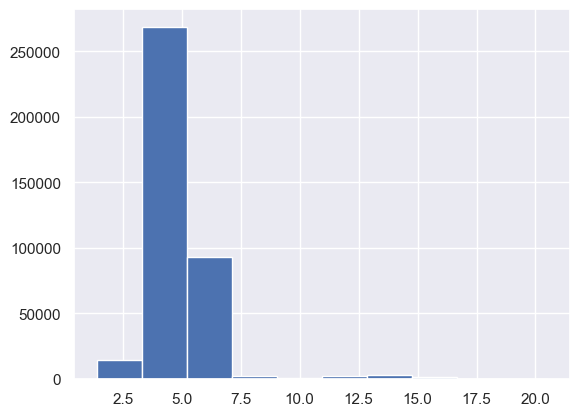

In [6]:
X_train['pmax[0]'].hist()

<Axes: >

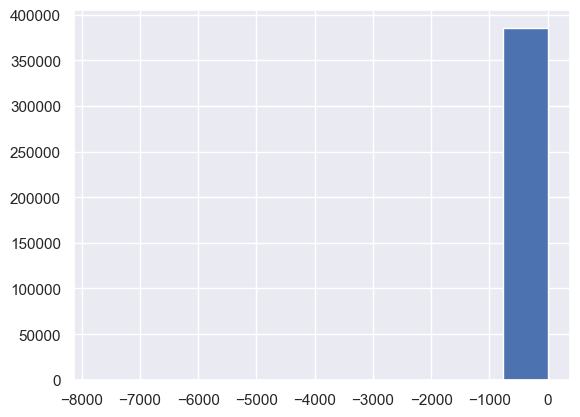

In [7]:
X_train['negpmax[0]'].hist()

## Correlation data

In [8]:
correlation_matrix = X_train.corr()
correlation_matrix

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
pmax[0],1.000000,0.018335,0.327321,0.011206,0.010996,0.039779,0.002944,0.037079,0.025052,-0.000410,...,0.018973,0.017296,0.041781,0.043686,0.010953,0.004688,0.016661,0.017093,0.048960,-0.004310
negpmax[0],0.018335,1.000000,0.023052,0.006887,-0.003504,0.001169,0.006569,0.002113,0.003092,0.003351,...,0.000070,-0.010024,0.002057,0.000614,0.006885,0.001132,0.002704,0.005987,-0.000723,-0.001560
area[0],0.327321,0.023052,1.000000,0.022349,-0.005608,0.005960,0.003864,0.007429,0.003197,-0.002480,...,0.006241,-0.003032,0.003985,0.008312,-0.000821,0.001034,0.010328,0.001625,0.010011,-0.004943
tmax[0],0.011206,0.006887,0.022349,1.000000,-0.060925,-0.001704,0.001563,-0.003239,0.017980,-0.003710,...,0.003360,0.002618,0.001702,0.004413,-0.009662,-0.002427,0.011137,0.001841,0.011034,-0.004251
rms[0],0.010996,-0.003504,-0.005608,-0.060925,1.000000,-0.000929,-0.000788,-0.000639,-0.000983,0.012685,...,-0.004148,0.000922,-0.003476,-0.004467,0.026848,0.011518,-0.019110,0.003803,-0.005919,0.003896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmax[17],0.004688,0.001132,0.001034,-0.002427,0.011518,0.011874,-0.002893,0.009086,-0.001370,0.008389,...,-0.041425,0.032563,-0.018393,-0.036889,0.102413,1.000000,-0.211005,0.079124,-0.050006,-0.003363
negpmax[17],0.016661,0.002704,0.010328,0.011137,-0.019110,0.014219,-0.000669,0.017425,-0.001740,-0.012294,...,-0.009255,0.013130,0.099820,0.037548,-0.125715,-0.211005,1.000000,-0.050543,0.051535,-0.010022
area[17],0.017093,0.005987,0.001625,0.001841,0.003803,0.044654,-0.006447,0.046327,-0.010621,0.004048,...,-0.035139,0.062797,0.128480,-0.011816,-0.007930,0.079124,-0.050543,1.000000,-0.009081,-0.020215
tmax[17],0.048960,-0.000723,0.010011,0.011034,-0.005919,0.006578,-0.002105,0.008116,0.020724,-0.008065,...,-0.022333,0.019067,0.079418,0.983054,-0.017422,-0.050006,0.051535,-0.009081,1.000000,-0.004609


In [9]:
corr = correlation_matrix
corr.style.background_gradient(cmap='coolwarm')

In [10]:
mask_gt = correlation_matrix >= 0.8 
mask_lt = correlation_matrix <= -0.8

In [11]:
features_correlated = []
for i, row in enumerate(correlation_matrix.index):
    for j, column in enumerate(correlation_matrix.columns):
        if mask_gt.loc[row, column] or mask_lt.loc[row, column]:
            if  i < j:
                features_correlated.append((row, column))
features_correlated

[('pmax[1]', 'area[1]'),
 ('pmax[3]', 'area[3]'),
 ('pmax[4]', 'area[4]'),
 ('pmax[5]', 'negpmax[5]'),
 ('pmax[5]', 'area[5]'),
 ('negpmax[5]', 'area[5]'),
 ('pmax[6]', 'area[6]'),
 ('pmax[8]', 'area[8]'),
 ('pmax[9]', 'area[9]'),
 ('pmax[10]', 'area[10]'),
 ('pmax[11]', 'area[11]'),
 ('pmax[13]', 'area[13]'),
 ('pmax[14]', 'area[14]'),
 ('tmax[15]', 'tmax[16]'),
 ('tmax[15]', 'tmax[17]'),
 ('tmax[16]', 'tmax[17]')]

We will handle highly correlated features later with PCA

## Outliers
We have a multivariate problem, so We will detect outliers using Isolation Forest.
We considered the following documentation, for choosing the outlier detector: https://scikit-learn.org/stable/modules/outlier_detection.html#overview-of-outlier-detection-methods

# Normalization

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_train_scaled

array([[-5.39769181e-01, -7.96333489e-01, -4.24875071e-01, ...,
         1.25747022e+00,  1.08543925e+00,  4.21652692e-01],
       [ 7.09130848e-01,  2.07239798e-02,  4.19063236e-01, ...,
         5.01895911e-01, -1.03530728e+00,  4.25256031e-01],
       [-3.91415051e-01, -1.70029551e-02, -5.65741820e-01, ...,
        -1.28265848e+00,  4.24451023e-01,  1.54901397e+00],
       ...,
       [-4.20510502e-01, -4.75695761e-02, -3.24127626e-01, ...,
         8.72812982e-01, -2.14655033e-01, -8.46417666e-01],
       [ 6.53922563e+00,  1.82044649e-03,  5.83645895e-01, ...,
         6.94589076e-01, -3.91128106e-01,  4.53944620e-01],
       [-4.47671606e-01, -1.05438509e+00, -3.12034847e-01, ...,
        -6.92415968e-02,  5.47242781e-01, -2.06341839e-01]])

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,-0.539769,-0.796333,-0.424875,-1.631676,1.948113,-0.661545,-0.284868,-0.706461,-1.819870,0.669864,...,-0.112338,1.858370,0.049734,1.288852,-0.261962,0.420479,2.033268,1.257470,1.085439,0.421653
1,0.709131,0.020724,0.419063,-0.299922,0.654864,-0.720831,0.148591,-0.803374,1.145795,-0.315801,...,1.581005,0.771351,-0.530615,-1.037841,-0.165920,1.140850,1.625614,0.501896,-1.035307,0.425256
2,-0.391415,-0.017003,-0.565742,-0.386813,0.187510,-0.711719,0.106909,-0.830605,1.010424,-0.939904,...,0.381059,0.466209,-0.475743,0.456415,0.386813,-0.906257,1.210071,-1.282658,0.424451,1.549014
3,-0.582485,0.027000,-0.613711,-0.918403,0.501802,-0.684792,0.165512,-0.440307,3.262701,0.043906,...,-0.578259,-0.333913,-0.554714,1.261660,-0.659403,-1.241779,-1.080827,0.148622,1.089288,-0.421708
4,-0.282387,0.012434,-0.095573,1.666664,-0.699511,-0.790196,0.113647,-0.953891,2.737834,-1.690921,...,0.078185,-0.449262,0.991063,-0.657011,-0.130535,-0.153862,-0.862903,0.179607,-0.772604,-0.941696


# PCA

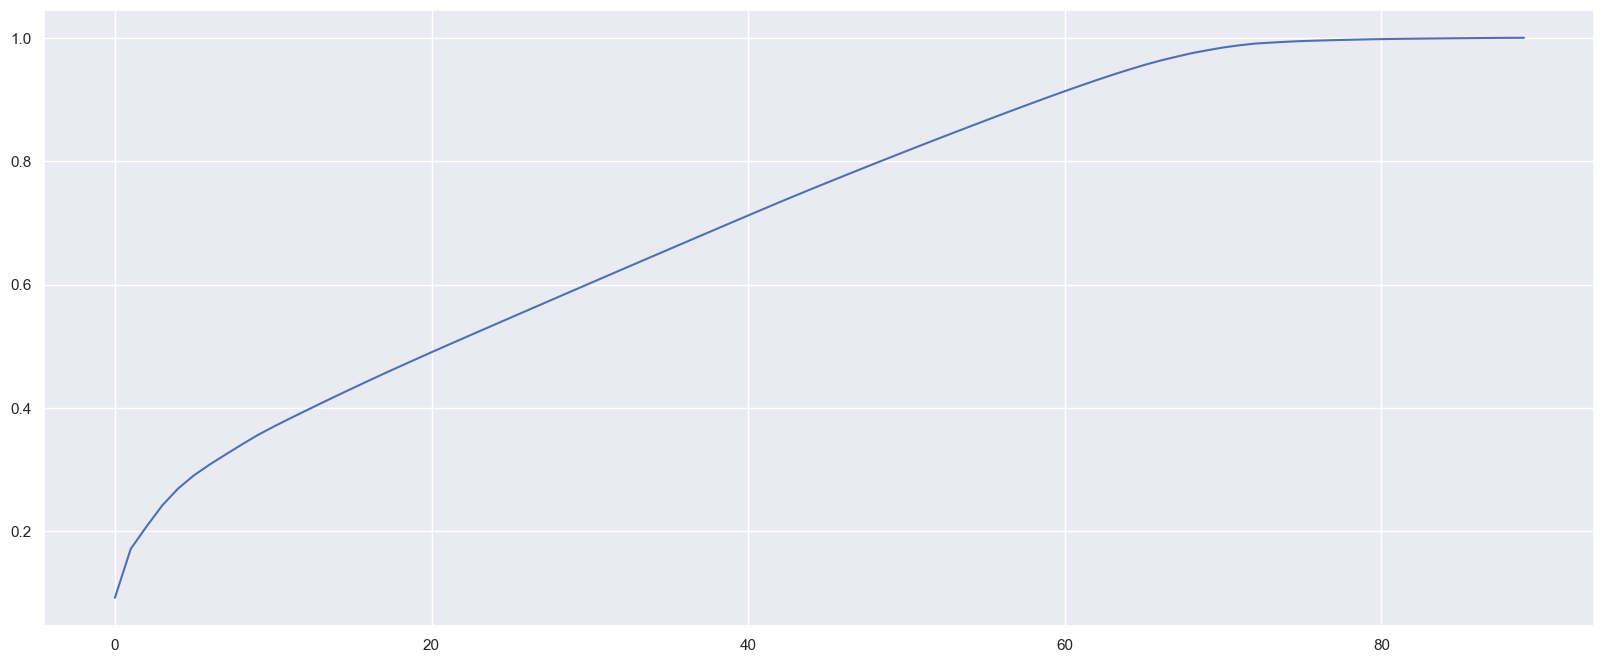

In [26]:
pca = PCA()
pca.fit(X_train_scaled)
plt.figure(figsize=(20,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xticks(ticks=np.arange(pca.n_features_), 
#             labels=[f'PC{i + 1}' for i in range(pca.n_features_)])


# plt.figure(figsize=(20,8))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.title('Xworkdf')
# #plt.ylim([0, 1.1])
# plt.xticks(ticks=np.arange(pca.n_features_), 
#            labels=[f'PC{i + 1}' for i in range(pca.n_features_)])
# plt.xlabel('Principal components')
# plt.ylabel('Cumulative explained variance')
# plt.grid()
# plt.show()

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09207887, 0.17133475, 0.20773389, 0.24210031, 0.26938078,
       0.29075157, 0.30834051, 0.32448655, 0.34032758, 0.35563608,
       0.36925988, 0.38215361, 0.3947305 , 0.40721014, 0.41955183,
       0.43167297, 0.4437091 , 0.4556005 , 0.46725189, 0.47878574,
       0.49024533, 0.5015461 , 0.51277603, 0.52397777, 0.53516263,
       0.54633108, 0.55747729, 0.56860621, 0.57972092, 0.59083152,
       0.6019338 , 0.61300616, 0.6240577 , 0.63510519, 0.6461312 ,
       0.65714686, 0.668151  , 0.67913524, 0.69009526, 0.70104798,
       0.71196053, 0.72284261, 0.73371319, 0.74433112, 0.75491846,
       0.7653124 , 0.77566033, 0.78598805, 0.79621206, 0.80636088,
       0.81645326, 0.82651516, 0.83646393, 0.84637446, 0.85617762,
       0.86596729, 0.87571193, 0.88530225, 0.89479805, 0.90423288,
       0.91347975, 0.92249297, 0.93132961, 0.93987288, 0.94802151,
       0.95583593, 0.96284876, 0.96907743, 0.97500467, 0.97980796,
       0.98430432, 0.98778935, 0.99061461, 0.99217059, 0.99358

In [35]:
def findm(pca):
        for i,var in enumerate(np.cumsum(pca.explained_variance_ratio_)):
                if var>=0.9:        
                        m=i+1 #It is +1 because the counting starts from 0
                        break    
        return m

In [41]:
n = findm(pca)
n

60

In [40]:
np.cumsum(pca.explained_variance_ratio_)[59]

0.904232883173431

In [42]:
pca = PCA(n_components=n)
pca.fit(X_train_scaled)

PCA(n_components=60)

In [43]:
X_train_pca = pca.transform(X_train_scaled)

(385500, 60)

In [45]:
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i + 1}' for i in range(n)])

In [46]:
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-1.970730,-4.482975,-4.432077,1.000213,1.230572,-2.287586,1.242529,-0.602391,1.079644,-0.382786,...,1.204768,-2.750828,-0.024007,2.079254,-0.067027,-0.084384,-0.970714,1.166788,2.171107,-0.121001
1,-1.866561,-5.678158,-5.680506,0.930797,5.149173,1.652574,0.384516,1.671474,6.922138,4.903882,...,1.996971,-0.049064,0.454065,0.128559,2.043504,-1.139969,-1.258776,-4.244627,-7.446397,2.081408
2,-1.483058,-5.456596,-5.261659,0.171387,1.615739,-1.208832,-0.878440,0.492562,-0.506748,-0.358931,...,0.358556,3.318616,2.150765,-1.356520,2.210565,-1.744126,0.149655,-2.502094,-2.564589,0.601245
3,-1.511325,-5.453778,-4.572291,1.069966,2.444868,-2.661594,-0.496805,0.475531,-1.042361,-0.099525,...,-0.432800,0.008904,-3.166387,-0.425985,-1.193879,1.439046,0.097196,-0.480051,-0.795541,-0.491941
4,-2.259065,-5.278755,-5.000165,-1.958232,1.111675,-1.071785,0.688746,0.783321,-0.153309,-0.186322,...,-1.101696,0.253233,1.218481,-0.657291,0.192651,-1.835303,0.165507,1.682119,0.556181,-0.900057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385495,3.210490,5.157313,-5.369369,-2.054598,2.828857,-0.405254,-1.246962,-0.028717,-1.211736,2.030201,...,-0.486019,-1.291668,-0.769493,-0.223926,-0.782038,-2.238872,1.856324,-3.062651,3.241884,-0.482408
385496,3.385398,3.694172,-5.879615,-1.006013,2.212244,0.685649,0.380304,-1.165657,4.016135,2.105266,...,-1.928612,-0.846172,0.578256,-0.590042,0.766139,1.085258,0.695427,-0.330962,-0.449611,-1.160431
385497,3.531103,4.984258,-5.629152,-1.543105,1.814505,-0.395627,-0.955421,-0.357560,0.285999,-0.933727,...,-0.916901,0.624777,0.231635,1.244486,-0.664224,-0.806464,1.214104,-0.192182,-0.440752,-0.785302
385498,2.627412,4.086000,-6.055759,-0.236882,3.623401,9.959387,0.551725,-0.727401,3.195412,2.905166,...,-0.876942,-0.569837,-0.436317,0.220666,-0.099746,-0.165235,0.344330,-0.181394,-0.009858,1.172906


In [48]:
pd.concat([X_train_pca, y1_train, y2_train], axis=1).to_csv(path + 'dataset_pca.csv', index=False)